# Linear & Polynomial Regression: Exploring Some Red Flags for Models that Underfit

## Project Overview

In this project, I fit linear regression and polynomial regression models to some randomly generated dataset. The dataset is purposely generated so that there is a nonlinear relationship between the target and the predictor. This will help to demonstrate what happens when a linear regression vastly underfits to the data. Polynomial regression is the natural solution to this.

This project will cover the following topics:
1. Linear regression
2. Polynomial regression
3. Assessing model performance with common metrics - RMSE, R2
4. Plotting model performance on learning curves

In [310]:
# Import libraries
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

sns.set()
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
sns.set_palette("Dark2")

np.random.seed(42)

## Dataset: Generated Nonlinear Data

In [311]:
# Generate some nonlinear data
m = 500
X = 9 * np.random.rand(m, 1) - 1
Y = 0.5 * X**2 - 3 * X + 7 + np.random.randn(m, 1)

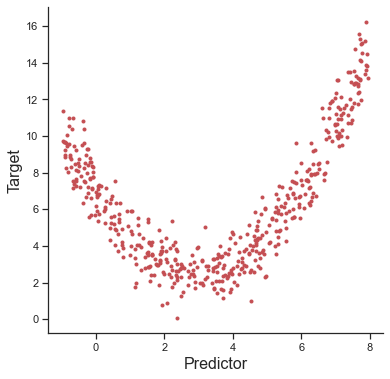

In [312]:
# Plot the data
plt.figure(figsize = (6, 6))
plt.plot(X, Y, "r.")
plt.xlabel("Predictor", fontsize=16)
plt.ylabel("Target", fontsize=16)
plt.show()

In [313]:
# Split the data into train and validation sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2)

## Fitting the Models

In [314]:
# Function for plotting the learning curves
def plot_learning_curves(model, X, Y, ylim):
    # Split the data into train and validation sets
    X_train, X_val, Y_train, Y_val = train_test_split(X, Y, test_size = 0.2)

    # Create empty lists for the errors
    train_errors, val_errors = [], []

    # Compute the errors
    for i in range(1, len(X_train)):
        # Fit the model - train up to observation i
        model.fit(X_train[:i], Y_train[:i])
        Y_train_predict = model.predict(X_train[:i])
        Y_val_predict = model.predict(X_val)
        # Append the errors to their lists
        train_errors.append(mean_squared_error(Y_train[:i], Y_train_predict))
        val_errors.append(mean_squared_error(Y_val, Y_val_predict))
    
    # Plot the errors
    plt.figure(figsize=(8, 6))
    plt.plot(np.sqrt(train_errors), "-b", linewidth = 2, label = "Train")
    plt.plot(np.sqrt(val_errors), "-g", linewidth = 2, label = "Validation")

    plt.legend(loc = "upper right")
    plt.ylim([0, ylim])

    plt.xlabel("Training Set Size", fontsize=16)
    plt.ylabel("RMSE", fontsize=16)
    plt.title("Learning Curves", fontsize=16)
    plt.show()

### Fitting a Linear Model

In [315]:
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, Y_train)

Y_predict = linear_regressor.predict(X_test)
linear_mse = mean_squared_error(Y_test, Y_predict)
print(f"MSE (linear regression): {round(linear_mse,2)}")

linear_r2_score = r2_score(Y_test, Y_predict)
print(f"R2 Score (linear regression): {round(linear_r2_score,2)}")


MSE (linear regression): 9.09
R2 Score (linear regression): 0.06


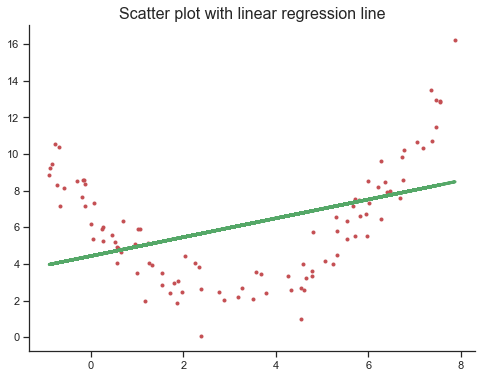

In [316]:
# Plot the linear regression line
plt.figure(figsize = (8,6))
plt.plot(X_test, Y_test, '.r')
plt.plot(X_test, Y_predict, '-g', linewidth = 3)
plt.title("Scatter plot with linear regression line", fontsize = 16)
plt.show()

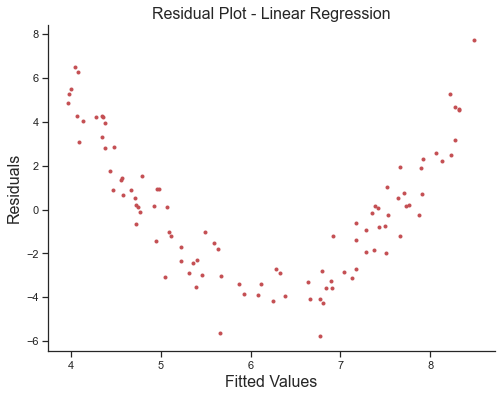

In [317]:
# Residual plot
linear_residuals = (Y_test - Y_predict)

plt.figure(figsize = (8,6))
plt.plot(Y_predict, linear_residuals, "r.")
plt.xlabel("Fitted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)
plt.title("Residual Plot - Linear Regression", fontsize = 16)
plt.show()

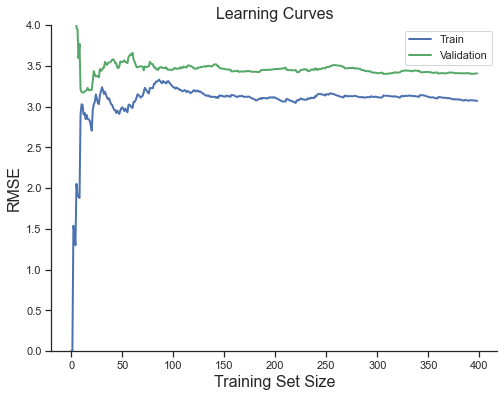

In [199]:
# Plot the learning curves
linear_regressor = LinearRegression()
plot_learning_curves(linear_regressor, X, Y, 4)

### Fitting a Polynomial Model

In [318]:
polynomial_features = PolynomialFeatures(degree = 2, include_bias = False)
X_train_poly = polynomial_features.fit_transform(X_train)
X_test_poly = polynomial_features.fit_transform(X_test)

linear_regressor = LinearRegression()
linear_regressor.fit(X_train_poly, Y_train)

Y_predict_poly = linear_regressor.predict(X_test_poly)
poly_mse = mean_squared_error(Y_test, Y_predict_poly)
print(f"MSE (polynomial regression): {round(poly_mse,2)}")

poly_r2_score = r2_score(Y_test, Y_predict_poly)
print(f"R2 Score (polynomial regression): {round(poly_r2_score,2)}")

MSE (polynomial regression): 1.0
R2 Score (polynomial regression): 0.9


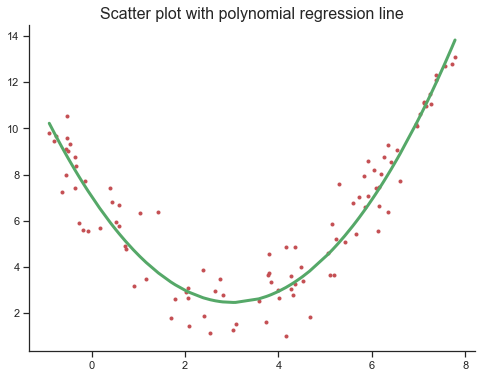

In [301]:
# Plot the polynomial regression line
X_test_s, Y_predict_poly_s = zip(*sorted(zip(X_test, Y_predict_poly)))

plt.figure(figsize = (8,6))
plt.plot(X_test, Y_test, '.r')
plt.plot(X_test_s, Y_predict_poly_s, '-g', linewidth = 3)
plt.title("Scatter plot with polynomial regression line", fontsize = 16)
plt.show()

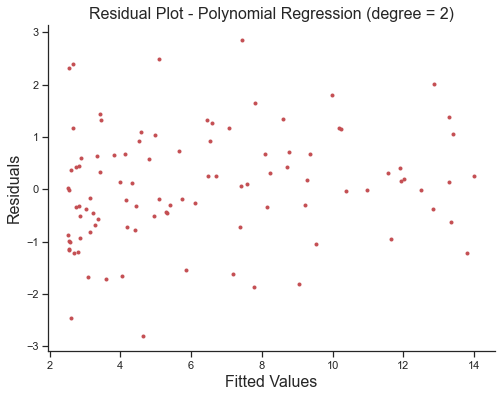

In [246]:
# Residual plot
poly_residuals = (Y_test - Y_predict_poly)

plt.figure(figsize = (8,6))
plt.plot(Y_predict_poly, poly_residuals, "r.")
plt.xlabel("Fitted Values", fontsize = 16)
plt.ylabel("Residuals", fontsize = 16)
plt.title("Residual Plot - Polynomial Regression (degree = 2)", fontsize = 16)
plt.show()

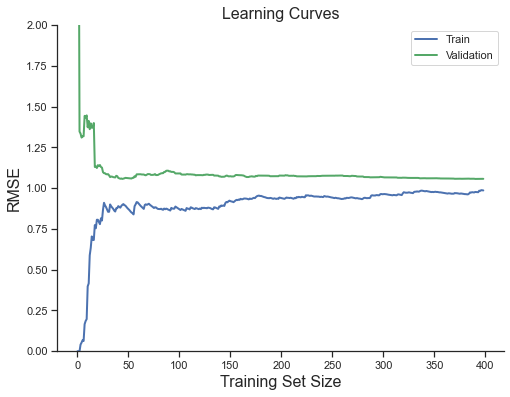

In [320]:
# Plot the learning curves
linear_regressor = LinearRegression()
X_poly = polynomial_features.fit_transform(X)
plot_learning_curves(linear_regressor, X_poly, Y, 2)